In this repository, we harness the scalability and modularity of Jupyter Lab to organize and document various machine learning and deep learning models—each clearly segmented into individual cells for clarity and reproducibility.

Our goal is to predict customer churn in the Indian telecom industry, exploring the real-world challenge of customer retention using modern classification tools.

This project integrates a wide spectrum of binary classification techniques, including:

Traditional machine learning models like Logistic Regression, Random Forests, and Support Vector Machines

Hyperparameter optimization and cross-validation workflows.

Performance diagnostics through precision-recall tradeoffs and visualizations.

In addition, we implement deep learning architectures—such as multi-layer perceptrons (MLPs), LSTM, and GRU models—to benchmark against classic ML models and analyze performance gains in high-dimensional spaces.

Each stage of experimentation is fully reproducible, visualized, and documented, serving both as a technical guide and a learning resource for those exploring churn modeling in a telecom context.

# Importing Libraries for Binary Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, auc, RocCurveDisplay, precision_score, recall_score, classification_report, confusion_matrix
import torch.nn as nn
import torch.optim as optim
import torchmetrics as tmetrics

# Performing Exploratory Data Analysis

In [2]:
demog = pd.read_csv(r"C:\Users\kenne\GIT DEMO 04.13.2025\PROJECTS\ONGOING\PYTHON\LOGISTIC REGRESSION\CUSTOMER CHURN IN TELECOM\telecom_demographics.csv")
usage = pd.read_csv(r"C:\Users\kenne\GIT DEMO 04.13.2025\PROJECTS\ONGOING\PYTHON\LOGISTIC REGRESSION\CUSTOMER CHURN IN TELECOM\telecom_usage.csv")

def Exploratory(data ,type='All', **kwargs):
    if type == 'All':
        print("=== Head ===")
        print(data.head())
        print("\n=== Info ===")
        print(data.info())
        print("\n=== Description ===")
        print(data.describe(include='all'))

    elif kwargs.get('head', False):
        print(data.head())

    elif kwargs.get('info', False):
        print(data.info())

    elif kwargs.get('describe', False):
        print(data.describe(include='all'))

    else:
        print("Please specify a valid option: 'head', 'info', or 'describe'")

Exploratory(demog,type="All")

=== Head ===
   customer_id telecom_partner gender  age             state       city  \
0        15169          Airtel      F   26  Himachal Pradesh      Delhi   
1       149207          Airtel      F   74       Uttarakhand  Hyderabad   
2       148119          Airtel      F   54         Jharkhand    Chennai   
3       187288    Reliance Jio      M   29             Bihar  Hyderabad   
4        14016        Vodafone      M   45          Nagaland  Bangalore   

   pincode registration_event  num_dependents  estimated_salary  
0   667173         2020-03-16               4             85979  
1   313997         2022-01-16               0             69445  
2   549925         2022-01-11               2             75949  
3   230636         2022-07-26               3             34272  
4   188036         2020-03-11               4             34157  

=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 10 columns):
 #   Column        

# Data Preparation and Merging

In [4]:
df = demog.merge(usage, on='customer_id', how='left')
df['churn'].value_counts()

churn
0    5197
1    1303
Name: count, dtype: int64

# Performing Data Clearning, Feature Selection & Feature Engineering

In [8]:
# One Hot Encoding for datetime variables
df['registration_event'] = pd.to_datetime(df['registration_event'])

df['day_of_year'] = df['registration_event'].dt.dayofyear
df['registration_day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['registration_day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

df = df.drop(['day_of_year','registration_event'],axis=1)

df.head()

# One Hot Encoding for categorical variables
df_cat = pd.get_dummies(df, columns=['telecom_partner', 'gender', 'state', 'city'])

# Splitting features and target
X = df_cat.drop(['churn','customer_id'], axis=1)
y = df_cat['churn']
print(list(X.columns))

['age', 'pincode', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'registration_day_sin', 'registration_day_cos', 'telecom_partner_Airtel', 'telecom_partner_BSNL', 'telecom_partner_Reliance Jio', 'telecom_partner_Vodafone', 'gender_F', 'gender_M', 'state_Andhra Pradesh', 'state_Arunachal Pradesh', 'state_Assam', 'state_Bihar', 'state_Chhattisgarh', 'state_Goa', 'state_Gujarat', 'state_Haryana', 'state_Himachal Pradesh', 'state_Jharkhand', 'state_Karnataka', 'state_Kerala', 'state_Madhya Pradesh', 'state_Maharashtra', 'state_Manipur', 'state_Meghalaya', 'state_Mizoram', 'state_Nagaland', 'state_Odisha', 'state_Punjab', 'state_Rajasthan', 'state_Sikkim', 'state_Tamil Nadu', 'state_Telangana', 'state_Tripura', 'state_Uttar Pradesh', 'state_Uttarakhand', 'state_West Bengal', 'city_Bangalore', 'city_Chennai', 'city_Delhi', 'city_Hyderabad', 'city_Kolkata', 'city_Mumbai']


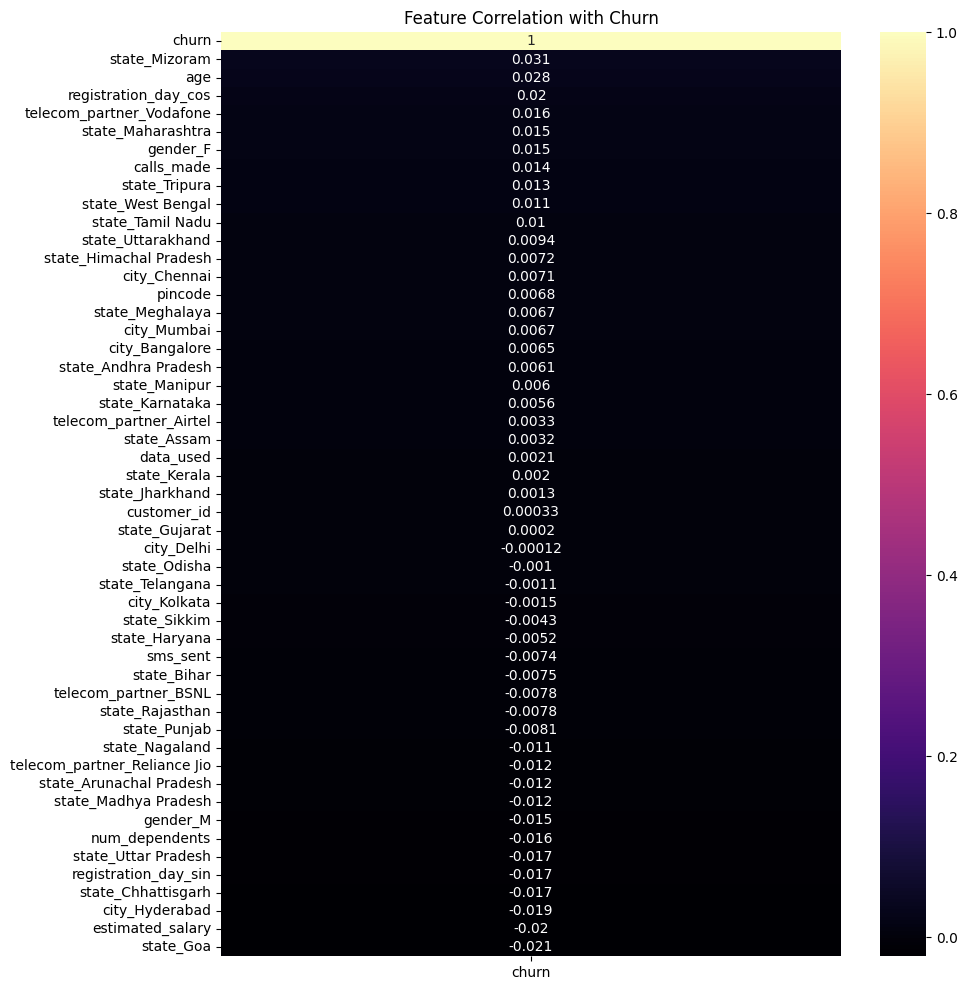

In [35]:
# Generating a heatmap

correlation = df_cat.corr(numeric_only=True)['churn'].sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.heatmap(correlation.to_frame(), annot=True, cmap='magma')
plt.title('Feature Correlation with Churn')
plt.show()

# SCALING & SPLITTING OUR DATA

In [10]:
scaler = StandardScaler()

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE
y_test.value_counts()

churn
0    1299
1     326
Name: count, dtype: int64

# Defining All Logistic Regression Models and it's hyper parameters that performs well in our Data

In [ ]:
# Define models and hyperparameters
import time

models = {
    "LogisticRegression": LogisticRegression(),
    "RidgeClassifier": RidgeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB()
}

# Define parameter grids using double underscore syntax
param_grid = {
    "LogisticRegression__C": [0.01, 0.1, 1, 10],
    "LogisticRegression__solver": ['liblinear', 'lbfgs'],

    "RidgeClassifier__alpha": [0.1, 1.0, 10.0],

    "RandomForest__n_estimators": [100, 200],
    "RandomForest__max_depth": [5, 10, None],
    "RandomForest__min_samples_split": [2, 5],

    "ExtraTrees__n_estimators": [100, 200],
    "ExtraTrees__max_depth": [5, 10, None],
    "ExtraTrees__min_samples_split": [2, 5],

    "GradientBoosting__n_estimators": [100, 200],
    "GradientBoosting__learning_rate": [0.01, 0.1],
    "GradientBoosting__max_depth": [3, 5],

    "AdaBoost__n_estimators": [50, 100],
    "AdaBoost__learning_rate": [0.01, 0.1, 1.0],

    "SVM__C": [0.1, 1, 10],
    "SVM__kernel": ['linear', 'rbf'],
    "SVM__gamma": ['scale', 'auto'],

    "KNN__n_neighbors": [3, 5, 7, 9],
    "KNN__weights": ['uniform', 'distance'],
    "KNN__metric": ['euclidean', 'manhattan'],

    # GaussianNB has no hyperparameters to tune
}

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

pipe_accuracies = {}
pipe_params = {}
pipelines = {}
model_times = {}
cv_scores = {}

for name, model in models.items():
    print(f"Processing model: {name}")
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        (name, model)
    ])

    start = time.time()
    scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='accuracy')
    cv_scores[name] = scores
    # Filter parameters for this model
    model_param_grid = {key: val for key, val in param_grid.items() if key.startswith(name + "__")}

    grid_search = GridSearchCV(pipeline, model_param_grid, cv=kf, scoring="accuracy", error_score="raise")
    grid_search.fit(X_train, y_train)

    pipe_accuracies[name] = grid_search.best_score_
    pipe_params[name] = grid_search.best_params_
    pipelines[name] = grid_search
    end = time.time()
    model_times[name] = end - start
    print(f"{name} trained in {model_times[name]:.2f} seconds")

cv_df = pd.DataFrame(cv_scores)

# Generate Leaderboard Table
summary_df = pd.DataFrame({
    "Mean Accuracy": cv_df.mean(),
    "Std Dev": cv_df.std(),
    "Training Time (s)": pd.Series(model_times)
}).sort_values("Mean Accuracy", ascending=False)

print(summary_df.round(4))

# Create boxplot
plt.figure(figsize=(12, 6))
cv_df.boxplot(patch_artist=True,
              boxprops=dict(facecolor='lightblue', color='navy'),
              medianprops=dict(color='red'),
              whiskerprops=dict(color='gray'),
              capprops=dict(color='gray'),
              flierprops=dict(markerfacecolor='gold', marker='o', markersize=5))

plt.title("Model Accuracy Distribution Across CV Folds", fontsize=14)
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Best model selection
best_model_name = max(pipe_accuracies, key=pipe_accuracies.get)
best_model_cv_score = pipe_accuracies[best_model_name]
best_model_info = pipe_params[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_model_info}")
print(f"Best CV Score: {best_model_cv_score:.4f}")

# Evaluate on test set
y_pred = pipelines[best_model_name].predict(X_test)
print(f"Test Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_pred, zero_division=1):.4f}")
print(f"Test Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Test F1 Score:  {f1_score(y_test, y_pred):.4f}")
total_time = sum(model_times.values())
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"The total training time of all models is: {minutes} minutes, {seconds} seconds.")

# PERFORMING METRICS AND VISUALIZATION FOR THE BEST PERFORMING MODEL

In [21]:
'''
The best model is Random Forest Classifier with CV Score 0.7998.
But based on prediction, we have a sever class imbalance in our prediction.

Best Model: RandomForest
Best Parameters: {'RandomForest__max_depth': None, 'RandomForest__min_samples_split': 5, 'RandomForest__n_estimators': 100}
Best CV Score: 0.7998
Test Accuracy:  0.7992
Test Precision: 1.0000
Test Recall:    0.0000
Test F1 Score:  0.0000
'''
#Generate the model
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', RandomForestClassifier(
#         n_estimators=100,
#         max_depth=None,
#         min_samples_split=5,
#         class_weight='balanced',
#         random_state=120
#     ))
# ])

''' Due to imbalance prediction in Random Forest, we'll consider to use nearby accurate model which is Logistic Regression'''

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        solver='liblinear',  # or 'lbfgs' for multi-class
        random_state=42
    ))
])

# Fit on training data
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Test Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_pred, zero_division=1):.4f}")
print(f"Test Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Test F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report \n {classification_report(y_test, y_pred)}")

Test Accuracy:  0.4997
Test Precision: 0.1975
Test Recall:    0.4877
Test F1 Score:  0.2812
Confusion Matrix 
 [[653 646]
 [167 159]]
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.50      0.62      1299
           1       0.20      0.49      0.28       326

    accuracy                           0.50      1625
   macro avg       0.50      0.50      0.45      1625
weighted avg       0.68      0.50      0.55      1625



# DEEP LEARNING TO BE CONTINUED ...

# GENERATING MODEL USING PYTORCH

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=32):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = x.unsqueeze(1)  # (B, 1, F)
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n[-1])

In [ ]:
class GRUClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=32):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = x.unsqueeze(1)  # (B, 1, F)
        _, h_n = self.gru(x)
        return self.fc(h_n[-1])

In [ ]:
def train(model, X_train, y_train, X_test, y_test, epochs=50, lr=1e-3):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        probs = torch.sigmoid(model(X_test))
        preds = (probs >= 0.5).float()
        acc = (preds == y_test).float().mean()
    return acc.item()

In [ ]:
input_dim = X_train_tensor.shape[1]

models = {
    "MLP": MLP(input_dim),
    "LSTM": LSTMClassifier(input_dim),
    "GRU": GRUClassifier(input_dim)
}

for name, net in models.items():
    acc = train(net, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
    print(f"{name} Accuracy: {acc:.4f}")